In [34]:
####################
## Tarea en clase ##
####################

# Crear funciones para calcular las medidas de tendencia central y de dispersión con Python puro (sin librerías)

import statistics

# Media
def my_mean(X):
    suma=0
    for x in X:
        suma += x
    return suma/len(X)
    
my_mean([1, 1, 2, 2, 2, 3, 4, 5, 6])


2.888888888888889

In [33]:
statistics.mean([1, 1, 2, 2, 2, 3, 4, 5, 6])

2.888888888888889

In [31]:
# Mediana
def my_median(X):
    if len(X) % 2 == 1:
        return sorted(X)[int((len(X)-1)/2)]
    else:
        return my_mean([sorted(X)[int(len(X)/2 - 1)], sorted(X)[int(len(X)/2)]])

my_median([1, 1, 2, 2, 2, 3, 4, 5, 6])


2

In [32]:
statistics.median([1, 1, 2, 2, 2, 3, 4, 5, 6])

2

In [29]:
# Moda
def my_mode(X):
    moda = X[0]
    contador_max = 1
    contador = 1
    for i in range(1, len(X)):
        if sorted(X)[i]==sorted(X)[i-1]:
            contador += 1
            if contador > contador_max:
                contador_max = contador
                moda = sorted(X)[i]
        else:
            contador = 1
    return moda
            
my_mode([1, 1, 2, 2, 2, 3, 4, 5, 6])

2

In [30]:
statistics.mode([1, 1, 2, 2, 2, 3, 4, 5, 6])

2

In [36]:
# Varianza
def my_variance(X):
    squared_dev_sum = 0
    for x in X:
        squared_dev_sum += (x - my_mean(X))**2
    return squared_dev_sum/(len(X)-1)

my_variance([1, 1, 2, 2, 2, 3, 4, 5, 6])

3.111111111111111

In [37]:
statistics.variance([1, 1, 2, 2, 2, 3, 4, 5, 6])

3.111111111111111

In [38]:
# Desviación Estándar
def my_sd(X):
    return (my_variance(X))**0.5

my_sd([1, 1, 2, 2, 2, 3, 4, 5, 6])

1.7638342073763937

In [39]:
statistics.stdev([1, 1, 2, 2, 2, 3, 4, 5, 6])

1.7638342073763937

In [2]:
# Comprueba si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

# Realizamos la prueba de Shapiro para revisar normalidad en los datos.

# Se crea dataframe sólo con campos numéricos.
import pandas as pd
import numpy as np
df = pd.read_csv('datos.csv')
df_numeric = df.select_dtypes(include=np.number)
df_num = df_numeric.apply(pd.to_numeric)


# Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
for columna in df_num:
	stat, p = shapiro(df_num[columna])
	print(columna)
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')
	print('')


# Se llega a la conclusión de que ninguna de las variables presenta normalidad, por lo que todas las variables son no paramétricas.

Modelo
Statistics=0.923, p=0.000
Sample does not look Gaussian (reject H0)

Cilindros
Statistics=0.756, p=0.000
Sample does not look Gaussian (reject H0)

Potencia (HP)
Statistics=0.921, p=0.000
Sample does not look Gaussian (reject H0)

Tamaño (L)
Statistics=0.893, p=0.000
Sample does not look Gaussian (reject H0)

R. Ciudad (km/l)
Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)

R. Carr. (km/l)
Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)

R. Comb. (km/l)
Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)

R. Ajust. (km/l)
Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)

CO2(g/km)
Statistics=0.937, p=0.000
Sample does not look Gaussian (reject H0)

NOx (g/1000km)
Statistics=0.394, p=0.000
Sample does not look Gaussian (reject H0)

Calificación Gas Ef. Inv.
Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)

Hibrido
Statistics=0.068, p=0.000
Sample does not look Gaussian (reject H0)



In [3]:
#############
## Tarea 3 ##
#############

# Calcula estadísticos descriptivos básicos para tus datos.
df_proc = pd.read_csv('datos_proc2.csv')
df_proc.describe()

,Modelo,Cilindros,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Hibrido,Marca_Mean_Encoded,Submarca_Mean_Encoded,Versión_Mean_Encoded,Trans._Mean_Encoded,Comb._Mean_Encoded,Categoría_Mean_Encoded
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.00000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,2014.177570,5.333840,255.287111,2.872883,10.600235,16.604230,13.174942,9.881100,256.734188,30.86003,4.877418,0.009346,256.734188,256.734188,256.734188,256.734188,256.734188,256.734188
std,2.159505,1.801643,132.920841,1.348754,3.289791,4.189682,3.605587,2.704213,75.626879,56.98805,2.485299,0.096231,47.283470,69.199888,75.222650,32.422567,0.458086,39.530221
min,2011.000000,3.000000,60.000000,0.898000,3.100000,6.700000,4.960000,3.720000,107.000000,0.00000,0.000000,0.000000,139.129032,111.000000,107.000000,163.000000,254.568528,178.539235
25%,2012.000000,4.000000,150.000000,1.800000,8.200000,13.440000,10.460000,7.840000,200.000000,10.00000,3.000000,0.000000,222.164835,201.000000,201.000000,230.705832,256.831063,204.461003
50%,2014.000000,4.000000,220.000000,2.500000,10.420000,16.390000,12.870000,9.650000,244.000000,17.00000,5.000000,0.000000,250.082547,246.727273,244.000000,271.689271,256.831063,270.917372
75%,2016.000000,6.000000,330.000000,3.600000,12.820000,19.600000,15.600000,11.700000,299.000000,28.00000,7.000000,0.000000,288.042857,294.000000,300.000000,271.689271,256.831063,294.606742
max,2018.000000,12.000000,888.000000,8.400000,27.460000,31.300000,28.930000,21.700000,627.000000,724.00000,10.000000,1.000000,481.760000,611.000000,627.000000,447.312500,256.831063,294.606742


In [4]:
# Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma.

import numpy as np

df_proc.corr()

,Modelo,Cilindros,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Hibrido,Marca_Mean_Encoded,Submarca_Mean_Encoded,Versión_Mean_Encoded,Trans._Mean_Encoded,Comb._Mean_Encoded,Categoría_Mean_Encoded
Modelo,1.000000,-0.083072,0.034738,-0.105382,0.276066,0.273855,0.275549,0.275515,-0.268884,-0.034228,0.265598,0.023395,-0.073780,-0.157906,-0.264245,-0.087986,0.012918,-0.016263
Cilindros,-0.083072,1.000000,0.871190,0.916374,-0.714194,-0.688676,-0.727540,-0.727584,0.799921,-0.084840,-0.774514,-0.020507,0.593143,0.805943,0.804153,0.431967,0.095811,0.399578
Potencia (HP),0.034738,0.871190,1.000000,0.866727,-0.713683,-0.680867,-0.727851,-0.727902,0.737185,-0.138442,-0.733139,0.011568,0.578843,0.749113,0.741032,0.392642,0.158589,0.468453
Tamaño (L),-0.105382,0.916374,0.866727,1.000000,-0.761748,-0.749826,-0.790848,-0.790883,0.835167,-0.080526,-0.834946,-0.029703,0.567893,0.836053,0.839657,0.406352,0.078826,0.485566
R. Ciudad (km/l),0.276066,-0.714194,-0.713683,-0.761748,1.000000,0.910299,0.970594,0.970578,-0.900163,0.026246,0.918983,0.224216,-0.534957,-0.828366,-0.897248,-0.404219,-0.068998,-0.571188
R. Carr. (km/l),0.273855,-0.688676,-0.680867,-0.749826,0.910299,1.000000,0.950795,0.950781,-0.906839,-0.036218,0.924596,0.085612,-0.546002,-0.840954,-0.903652,-0.385610,-0.001996,-0.599462
R. Comb. (km/l),0.275549,-0.727540,-0.727851,-0.790848,0.970594,0.950795,1.000000,0.999999,-0.930311,0.051128,0.948898,0.169384,-0.556964,-0.858765,-0.926669,-0.396778,-0.095001,-0.589475
R. Ajust. (km/l),0.275515,-0.727584,-0.727902,-0.790883,0.970578,0.950781,0.999999,1.000000,-0.930332,0.051150,0.948910,0.169368,-0.557008,-0.858805,-0.926691,-0.396802,-0.095008,-0.589490
CO2(g/km),-0.268884,0.799921,0.737185,0.835167,-0.900163,-0.906839,-0.930311,-0.930332,1.000000,0.020633,-0.962325,-0.109972,0.625220,0.915017,0.994655,0.428718,0.006057,0.522701
NOx (g/1000km),-0.034228,-0.084840,-0.138442,-0.080526,0.026246,-0.036218,0.051128,0.051150,0.020633,1.000000,-0.028093,-0.027787,-0.015058,0.036299,0.019517,-0.094852,-0.867588,0.099843


**INTERPRETACIONES:**

Contrario a lo que esperaba de que las emisiones de CO2(g/km) y de NOx (g/1000km) tuvieran una correlación positiva fuerte, en realidad 
tienen una correlación cercana a cero, con lo que se podría concluir que las emisiones de CO2 de un vehículo no se relaciona con sus emisiones de NOx.

El par de variables con mayor correlación positiva de casi 1 son Rendimiento Combinado (km/l) y Rendimiento Ajustado (km/l), lo cual sí me hace sentido y podría evidenciar que 
estas variables aportan la misma información al modelo y se podría eliminar alguna de las dos.

El par de variables con mayor correlación negativa de -0.96 son las emisiones de CO2 y la Calificación de Gas Ef. Inv., lo cual sí me hace sentido ya que entre menor sean las 
cantidades de emisión de CO2 de los vehículos mayor va a ser su Calificación de Gas de Efecto Invernadero.

In [5]:
# Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación.

# Realizaremos la prueba de Spearman's Rank Correlation para comprobar si los tres pares de variables comentados arriba en realidad tienen una relación monótona.

# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr

print('CO2(g/km) and NOx (g/1000km)')
stat, p = spearmanr(df_proc['CO2(g/km)'], df_proc['NOx (g/1000km)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
print('')

print('R. Comb. (km/l) and R. Ajust. (km/l)')
stat, p = spearmanr(df_proc['R. Comb. (km/l)'], df_proc['R. Ajust. (km/l)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
print('')

print('CO2(g/km) and Calificación Gas Ef. Inv.')
stat, p = spearmanr(df_proc['CO2(g/km)'], df_proc['Calificación Gas Ef. Inv.'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
print('')

# Se llega a la conclusión de que los tres pares de variables son dependientes. 
# Sin embargo para la primera prueba de CO2 y NOx con una significancia del 1% habría suficiente evidencia para afirmar que las variables son independientes.

CO2(g/km) and NOx (g/1000km)
stat=0.031, p=0.038
Probably dependent

R. Comb. (km/l) and R. Ajust. (km/l)
stat=1.000, p=0.000
Probably dependent

CO2(g/km) and Calificación Gas Ef. Inv.
stat=-0.992, p=0.000
Probably dependent



Modelo


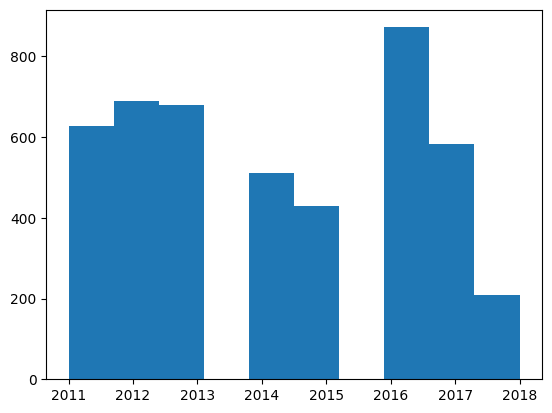

Cilindros


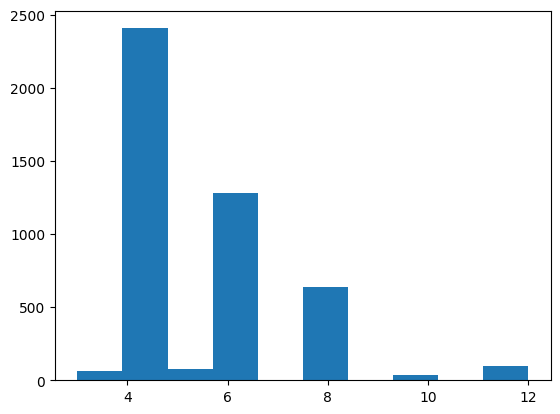

Potencia (HP)


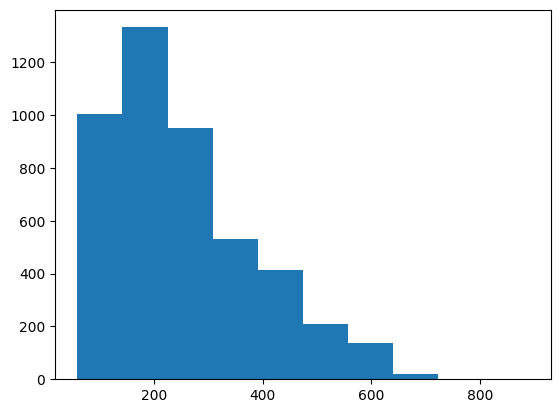

Tamaño (L)


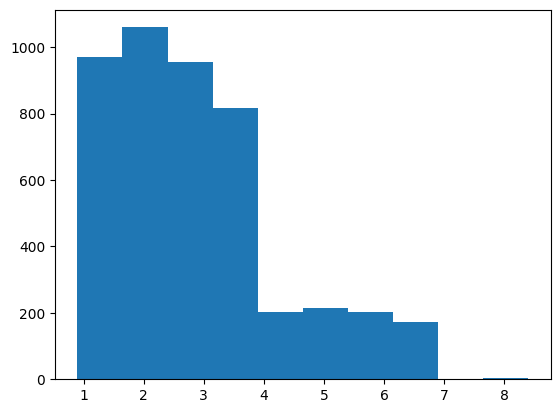

R. Ciudad (km/l)


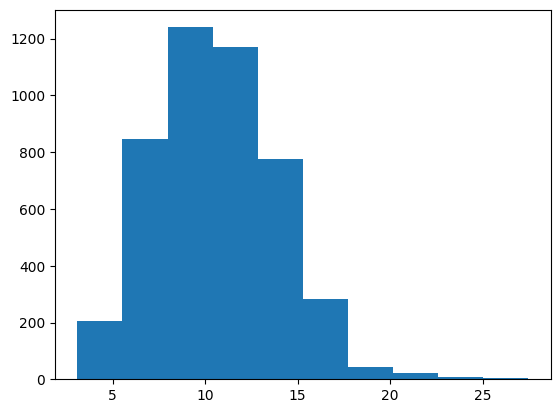

R. Carr. (km/l)


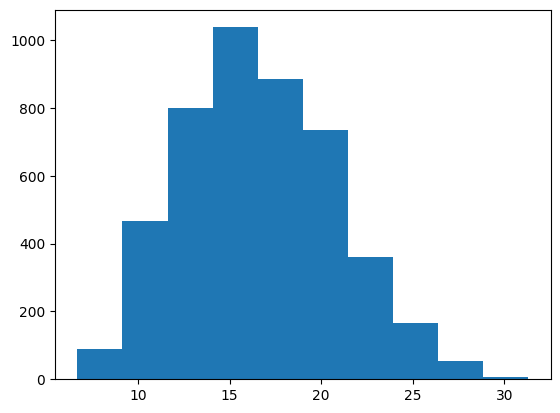

R. Comb. (km/l)


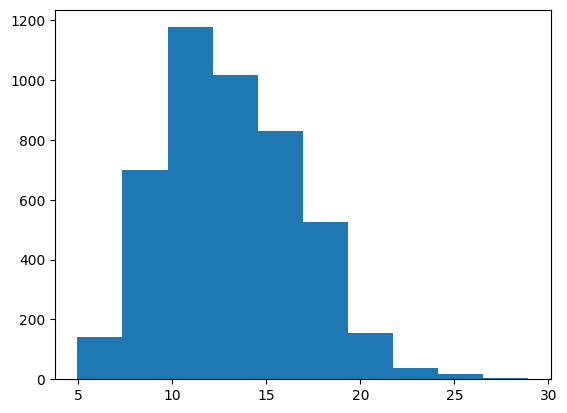

R. Ajust. (km/l)


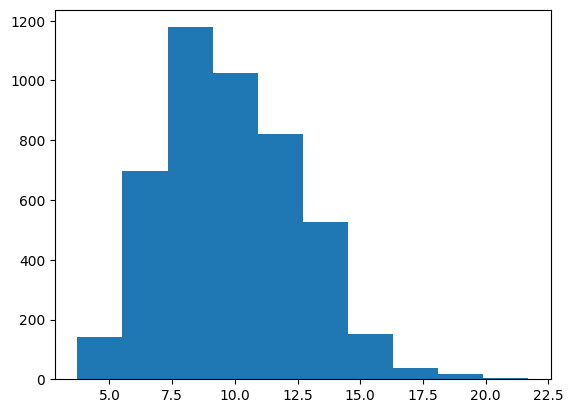

CO2(g/km)


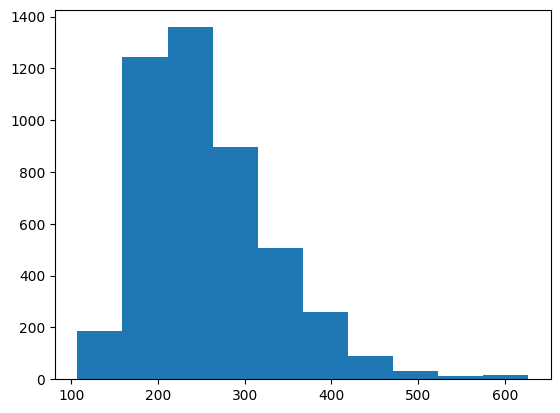

NOx (g/1000km)


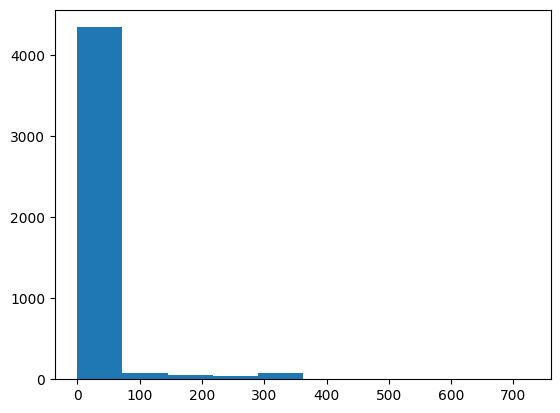

Calificación Gas Ef. Inv.


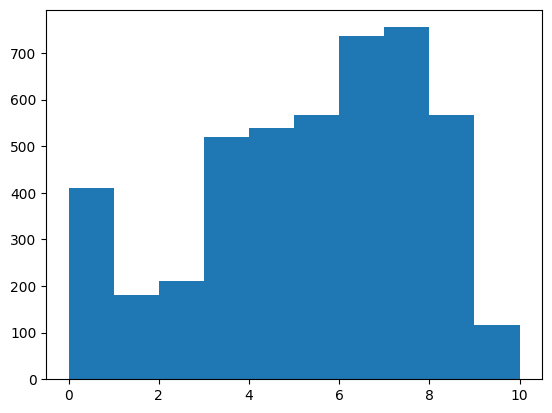

Hibrido


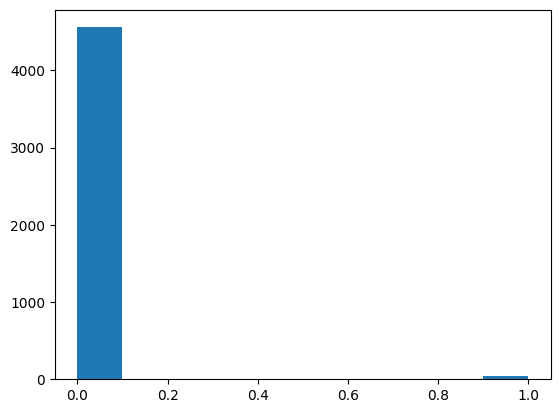

Marca_Mean_Encoded


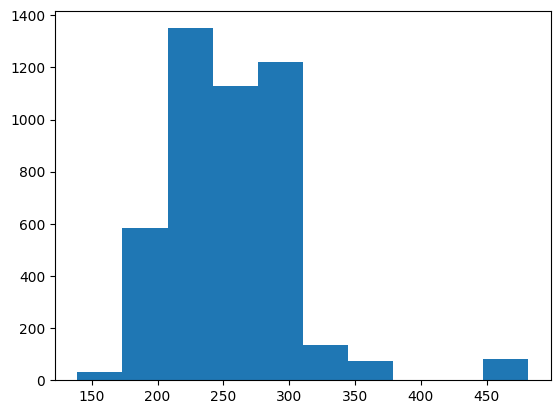

Submarca_Mean_Encoded


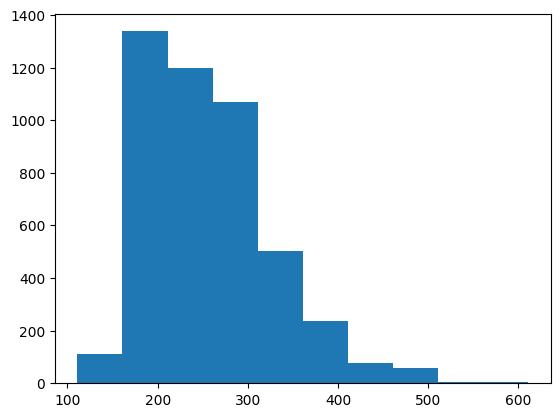

Versión_Mean_Encoded


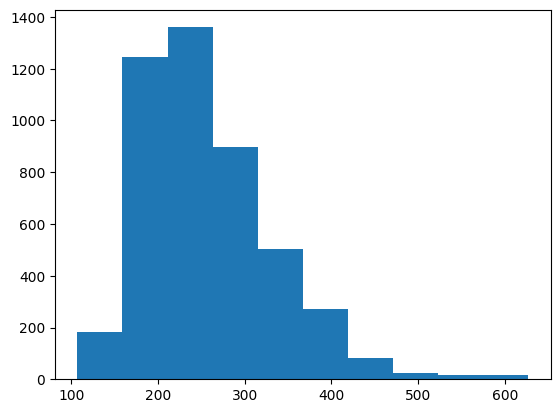

Trans._Mean_Encoded


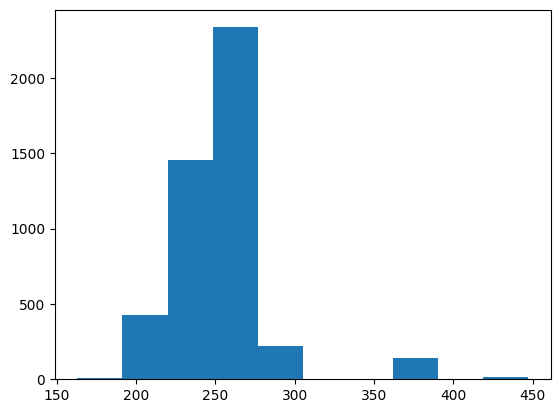

Comb._Mean_Encoded


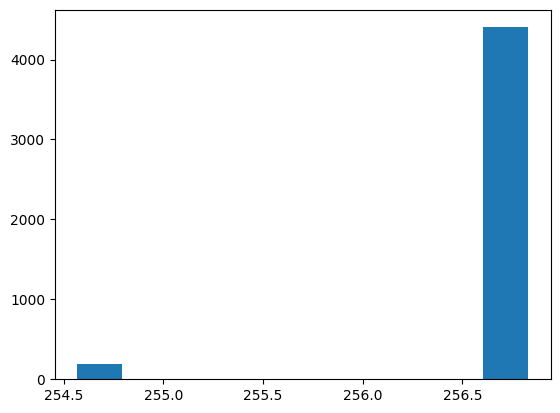

Categoría_Mean_Encoded


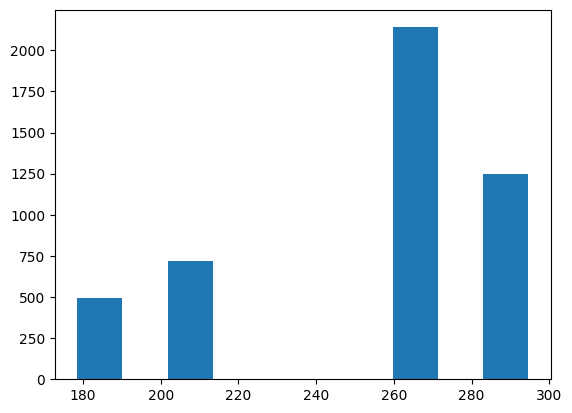

In [6]:
# Presenta tus resultados gráficamente

# Se grafican los histogramas de cada una de las variables para confirmar que no tienen la forma de una curva normal.

# histogram plot
from matplotlib import pyplot

for columna in df_proc:
    # histogram plot
    pyplot.hist(df_proc[columna])
    print(columna)
    pyplot.show()